<a href="https://colab.research.google.com/github/tatsubo777/Kaggle_Signate_competition/blob/master/volatility_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
#グラフ描写ライブラリ
from matplotlib import pyplot as plt
from datetime import datetime

sample = pd.read_csv('drive/My Drive/machine/SIgnate/Competition/optiver-realized-volatility-prediction/sample_submission.csv')
sample


Mounted at /content/drive


,row_id,target
0,0-4,0.003048
1,0-32,0.003048
2,0-34,0.003048


In [2]:
test = pd.read_csv("drive/My Drive/machine/SIgnate/Competition/optiver-realized-volatility-prediction/test.csv")
test

,stock_id,time_id,row_id
0,0,4,0-4
1,0,32,0-32
2,0,34,0-34


In [4]:
book_testparquet = pd.read_parquet("drive/My Drive/machine/SIgnate/Competition/optiver-realized-volatility-prediction/book_test.parquet/stock_id=0")
book_testparquet


,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,4,0,1.000049,1.000590,0.999656,1.000639,91,100,100,24
1,4,1,1.000049,1.000590,0.999656,1.000639,91,100,100,20
2,4,5,1.000049,1.000639,0.999656,1.000885,290,20,101,15


In [5]:
trade_testparquet = pd.read_parquet("drive/My Drive/machine/SIgnate/Competition/optiver-realized-volatility-prediction/trade_test.parquet/stock_id=0")
trade_testparquet

,time_id,seconds_in_bucket,price,size,order_count
0,4,7,1.000344,1,1
1,4,24,1.000049,100,7
2,4,27,1.000059,100,3


In [6]:
train = pd.read_csv("drive/My Drive/machine/SIgnate/Competition/optiver-realized-volatility-prediction/train.csv")
train

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
...,...,...,...
428927,126,32751,0.003461
428928,126,32753,0.003113
428929,126,32758,0.004070
428930,126,32763,0.003357


In [7]:
book_example = pd.read_parquet('drive/My Drive/machine/SIgnate/Competition/optiver-realized-volatility-prediction/book_train.parquet/stock_id=0')
book_example


,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28


In [8]:
trade_example = pd.read_parquet("drive/My Drive/machine/SIgnate/Competition/optiver-realized-volatility-prediction/trade_train.parquet/stock_id=0")
trade_example

,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.002301,326,12
1,5,46,1.002778,128,4
2,5,50,1.002818,55,1
3,5,57,1.003155,121,5
4,5,68,1.003646,4,1
...,...,...,...,...,...
123438,32767,471,0.998659,200,3
123439,32767,517,0.998515,90,1
123440,32767,523,0.998563,1,1
123441,32767,542,0.998803,90,4


In [9]:
train

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
...,...,...,...
428927,126,32751,0.003461
428928,126,32753,0.003113
428929,126,32758,0.004070
428930,126,32763,0.003357


In [10]:
for col in train.columns:
    print(col,':',len(train[col].unique()))

stock_id : 112
time_id : 3830
target : 414287


In [11]:
stock = train.groupby('stock_id')['target'].agg(['median','mean','std','count','sum']).reset_index()
stock


,stock_id,median,mean,std,count,sum
0,0,0.003180,0.004028,0.002855,3830,15.429071
1,1,0.003719,0.004362,0.002433,3830,16.704962
2,2,0.001748,0.002385,0.002339,3830,9.133223
3,3,0.005422,0.006182,0.003201,3830,23.675414
4,4,0.003397,0.004197,0.002879,3830,16.073408
...,...,...,...,...,...,...
107,122,0.003176,0.003762,0.002300,3830,14.407997
108,123,0.001967,0.002506,0.001816,3830,9.599594
109,124,0.003143,0.003691,0.001953,3830,14.135579
110,125,0.001575,0.002016,0.001703,3830,7.719409


mean_value= 0.0038805243039130312


(array([ 5., 25., 25., 22., 18.,  8.,  3.,  4.,  1.,  1.]),
 array([0.00147492, 0.00219811, 0.0029213 , 0.00364449, 0.00436768,
        0.00509087, 0.00581406, 0.00653724, 0.00726043, 0.00798362,
        0.00870681]),
 <a list of 10 Patch objects>)

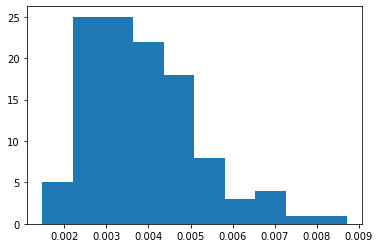

In [12]:
print('mean_value=',stock['mean'].mean())
plt.hist(stock['mean'])

stock_sum= 14.860998424142867


(array([ 5., 25., 25., 22., 18.,  8.,  3.,  4.,  1.,  1.]),
 array([ 5.64894774,  8.4187619 , 11.18857607, 13.95839023, 16.72820439,
        19.49801856, 22.26783272, 25.03764689, 27.80746105, 30.57727522,
        33.34708938]),
 <a list of 10 Patch objects>)

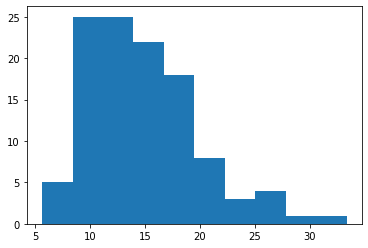

In [13]:
print('stock_sum=',stock['sum'].mean())
plt.hist(stock['sum'])


stock_sum= 14.860998424142867


(array([ 5., 25., 25., 22., 18.,  8.,  3.,  4.,  1.,  1.]),
 array([ 5.64894774,  8.4187619 , 11.18857607, 13.95839023, 16.72820439,
        19.49801856, 22.26783272, 25.03764689, 27.80746105, 30.57727522,
        33.34708938]),
 <a list of 10 Patch objects>)

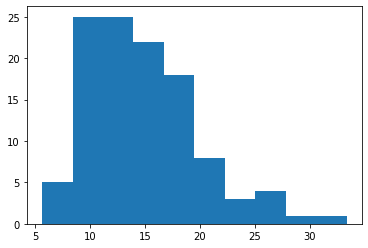

In [15]:
print('stock_sum=',stock['sum'].mean())
plt.hist(stock['sum'])

In [16]:
book_example

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28


In [17]:
book_test = book_example.query('time_id ==5',engine='python')
book_test

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
297,5,585,1.003129,1.003749,1.003025,1.003801,100,3,26,3
298,5,586,1.003129,1.003749,1.002612,1.003801,100,3,2,3
299,5,587,1.003129,1.003749,1.003025,1.003801,100,3,26,3
300,5,588,1.003129,1.003749,1.002612,1.003801,100,3,2,3


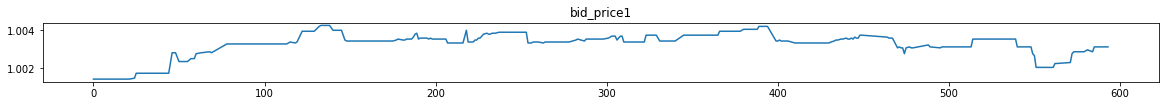

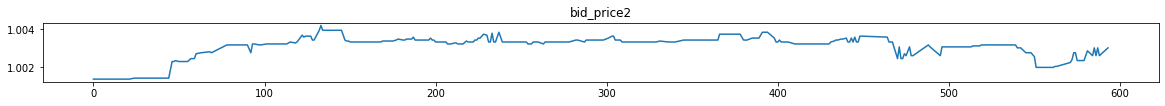

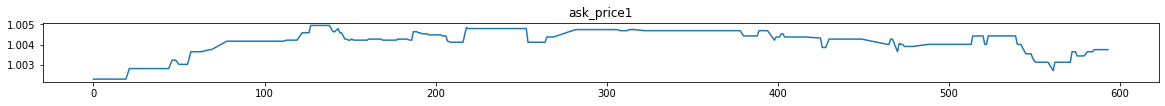

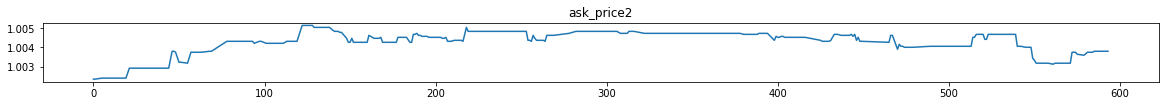

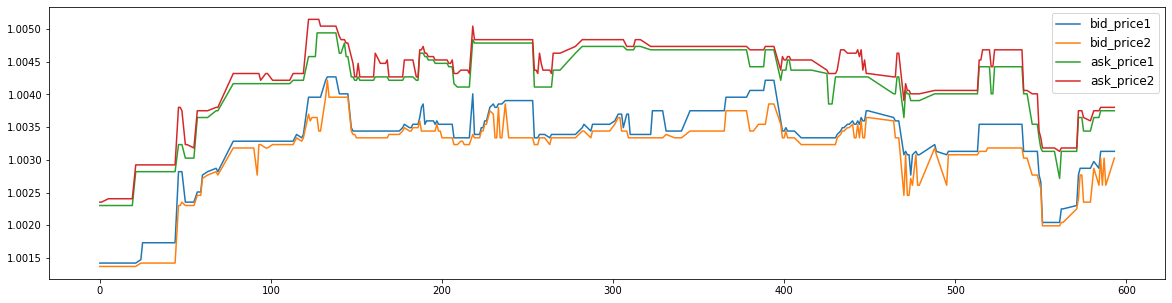

In [18]:
samples = ['bid_price1','bid_price2','ask_price1','ask_price2']
for num,a in enumerate(samples):
    plt.figure(figsize=(20,5))#ウインドウ
    plt.subplot(4,1,num+1)#１行４列分割でグラフを作成、３つ目の引数はサブ領域の番号
    plt.plot(book_test['seconds_in_bucket'],book_test[a])
    plt.title(a)
plt.show()
plt.figure(figsize = (20,5)) 

for num,a in enumerate(samples):
    plt.plot(book_test['seconds_in_bucket'],book_test[a],label=a,)
    plt.legend(fontsize=12)

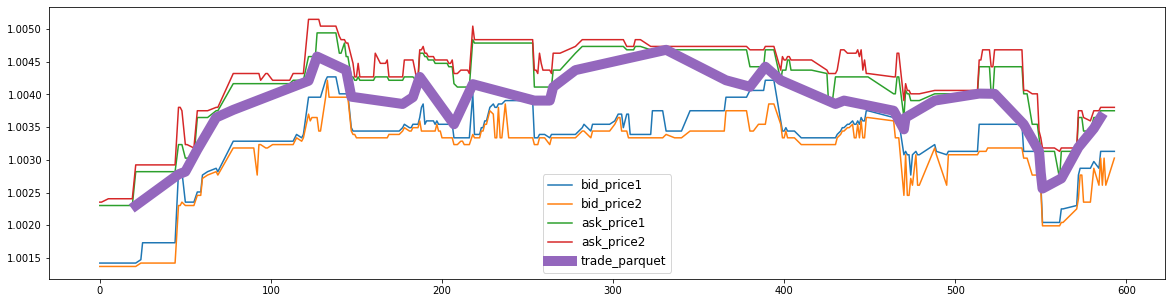

In [19]:
trade_test = trade_example.query('time_id==5',engine='python')

plt.figure(figsize=(20,5))

for num,a in enumerate(samples):
    plt.plot(book_test['seconds_in_bucket'],book_test[a],label=a)

plt.plot(trade_test['seconds_in_bucket'],trade_test['price'],label='trade_parquet',lw=10)
plt.legend(fontsize=12)

In [20]:
trade_test

,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.002301,326,12
1,5,46,1.002778,128,4
2,5,50,1.002818,55,1
3,5,57,1.003155,121,5
4,5,68,1.003646,4,1
5,5,78,1.003762,134,5
6,5,122,1.004207,102,3
7,5,127,1.004577,1,1
8,5,144,1.004370,6,1
9,5,147,1.003964,233,4


In [21]:
stock0 = train.query('stock_id==0',engine='python')
min_index = stock0['target'].idxmin()#最小値の列名を取得
min_time_id = stock0.iloc[min_index]['time_id']#ilocは要素の抽出
print('min_time_id is',min_time_id,'target is',stock0.iloc[min_index]['target'])

min_time_id is 24253.0 target is 0.000593833


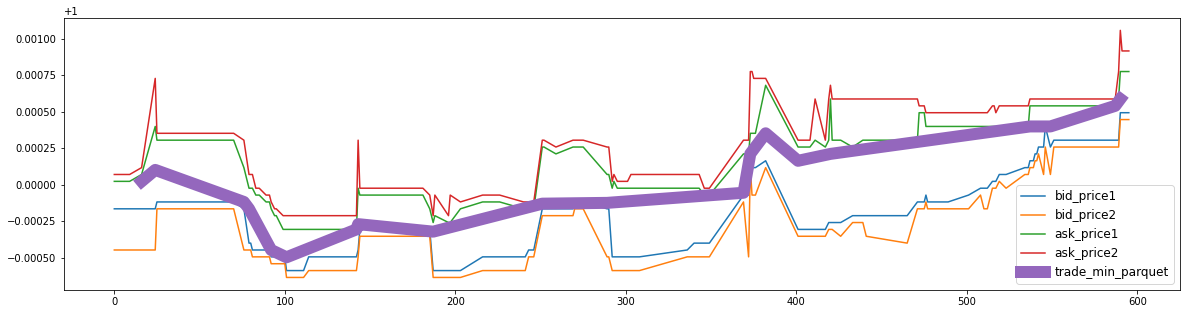

In [22]:
book_test_min = book_example.query('time_id == @min_time_id',engine = 'python')#変数には@をつける
trade_test_min = trade_example.query('time_id== @min_time_id',engine = 'python')

plt.figure(figsize =(20,5))

for num,a in enumerate(samples):
    
    plt.plot(book_test_min['seconds_in_bucket'],book_test_min[a],label=a)

plt.plot(trade_test_min['seconds_in_bucket'],trade_test_min['price'],label='trade_min_parquet',lw=12)
plt.legend(fontsize=12)

In [23]:
max_index = stock0['target'].idxmax()
max_time_id = stock0.iloc[max_index]['time_id']
print('max_time_id is',max_time_id,'target is',max_index)

max_time_id is 19725.0 target is 2394


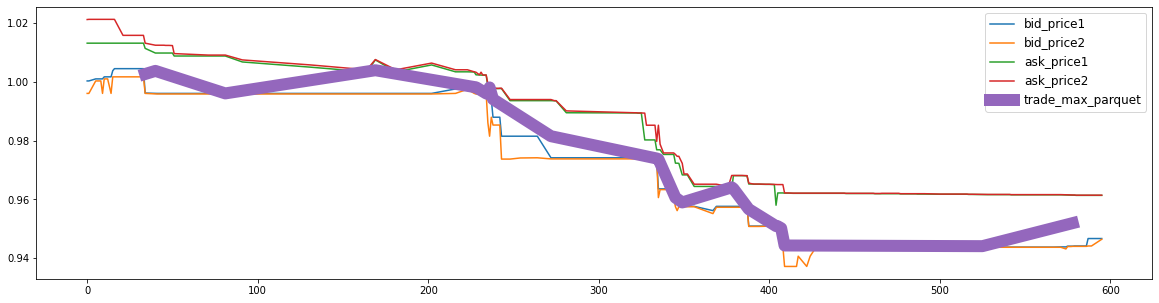

In [24]:
book_test_max =  book_example.query('time_id == @max_time_id',engine = 'python')
trade_test_max = trade_example.query('time_id == @max_time_id',engine = 'python')

plt.figure(figsize=(20,5))

for num,a in enumerate(samples):
    plt.plot(book_test_max['seconds_in_bucket'],book_test_max[a],label=a)

plt.plot(trade_test_max['seconds_in_bucket'],trade_test_max['price'],label = 'trade_max_parquet',lw=12)
plt.legend(fontsize=12)


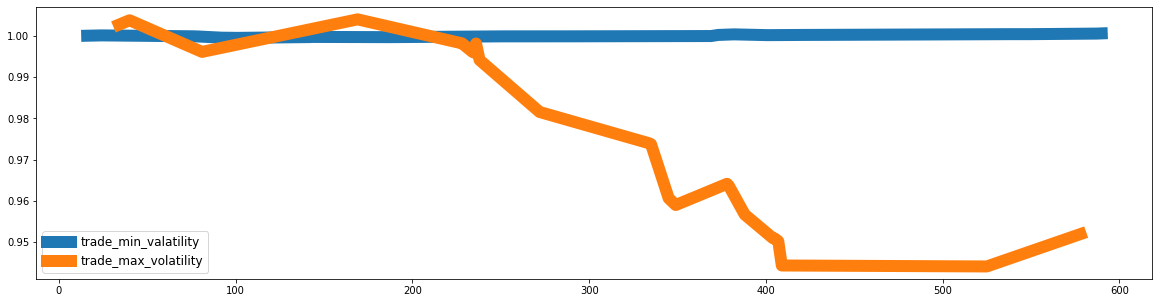

In [25]:
plt.figure(figsize=(20,5))
plt.plot(trade_test_min['seconds_in_bucket'],trade_test_min['price'],label = 'trade_min_valatility',lw=12)
plt.plot(trade_test_max['seconds_in_bucket'],trade_test_max['price'],label = 'trade_max_volatility', lw=12)
plt.legend(fontsize=12)

ボラティリティが高いときは価格変動が起きやすい

In [26]:
stock

,stock_id,median,mean,std,count,sum
0,0,0.003180,0.004028,0.002855,3830,15.429071
1,1,0.003719,0.004362,0.002433,3830,16.704962
2,2,0.001748,0.002385,0.002339,3830,9.133223
3,3,0.005422,0.006182,0.003201,3830,23.675414
4,4,0.003397,0.004197,0.002879,3830,16.073408
...,...,...,...,...,...,...
107,122,0.003176,0.003762,0.002300,3830,14.407997
108,123,0.001967,0.002506,0.001816,3830,9.599594
109,124,0.003143,0.003691,0.001953,3830,14.135579
110,125,0.001575,0.002016,0.001703,3830,7.719409


In [27]:
#submit
stock2=stock[['stock_id','median']]
stock2=stock2.set_index('stock_id')
stock2


,median
stock_id,
0,0.003180
1,0.003719
2,0.001748
3,0.005422
4,0.003397
...,...
122,0.003176
123,0.001967
124,0.003143


In [28]:
#辞書型にする
stock_dict = stock2.to_dict()
#example
stock_dict

{'median': {0: 0.00317963,
  1: 0.0037193545,
  2: 0.0017475160000000002,
  3: 0.0054220195,
  4: 0.0033969760000000003,
  5: 0.00433197,
  6: 0.0062160645,
  7: 0.0027697995000000005,
  8: 0.003568252,
  9: 0.0047314,
  10: 0.0028121025,
  11: 0.003771356,
  13: 0.001981252,
  14: 0.0021647765,
  15: 0.0029899295000000003,
  16: 0.0033217575,
  17: 0.0032944785,
  18: 0.0074447075,
  19: 0.0022720780000000003,
  20: 0.0022925315,
  21: 0.002027063,
  22: 0.004080189499999999,
  23: 0.003597655,
  26: 0.002538299,
  27: 0.0054865565,
  28: 0.0023513305,
  29: 0.0015100349999999998,
  30: 0.003006717,
  31: 0.0030317039999999996,
  32: 0.002237557,
  33: 0.004650538,
  34: 0.0020089920000000002,
  35: 0.0024970154999999997,
  36: 0.002887965,
  37: 0.005581582999999999,
  38: 0.003675794,
  39: 0.0020067590000000003,
  40: 0.0047157035,
  41: 0.001660599,
  42: 0.0026471285,
  43: 0.0011142695,
  44: 0.0027712125,
  46: 0.001556437,
  47: 0.0017984004999999999,
  48: 0.002787181,
  50: 

In [29]:
sample

,row_id,target
0,0-4,0.003048
1,0-32,0.003048
2,0-34,0.003048


In [30]:
sample['stock_id'] = [s.split("-")[0] for s in sample['row_id']]
sample

,row_id,target,stock_id
0,0-4,0.003048,0
1,0-32,0.003048,0
2,0-34,0.003048,0


In [31]:
sample['target'] = [stock_dict['median'][int(s)] for s in sample['stock_id']]#targetに中央値を入れる
sample


,row_id,target,stock_id
0,0-4,0.00318,0
1,0-32,0.00318,0
2,0-34,0.00318,0


In [32]:
submission = sample.drop('stock_id',axis=1)
submission

,row_id,target
0,0-4,0.00318
1,0-32,0.00318
2,0-34,0.00318


In [33]:
submission.to_csv("submission.csv",index=False)